In [1]:
# 데이터 샘플본을 통한 그래프 출력
import seaborn as sns
# sns의 load_dataset메서드를 실행하여 데이터 전부를 titanic변수에 할당
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

In [2]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
import matplotlib.pyplot as plt

In [5]:
sns.set_style('darkgrid')

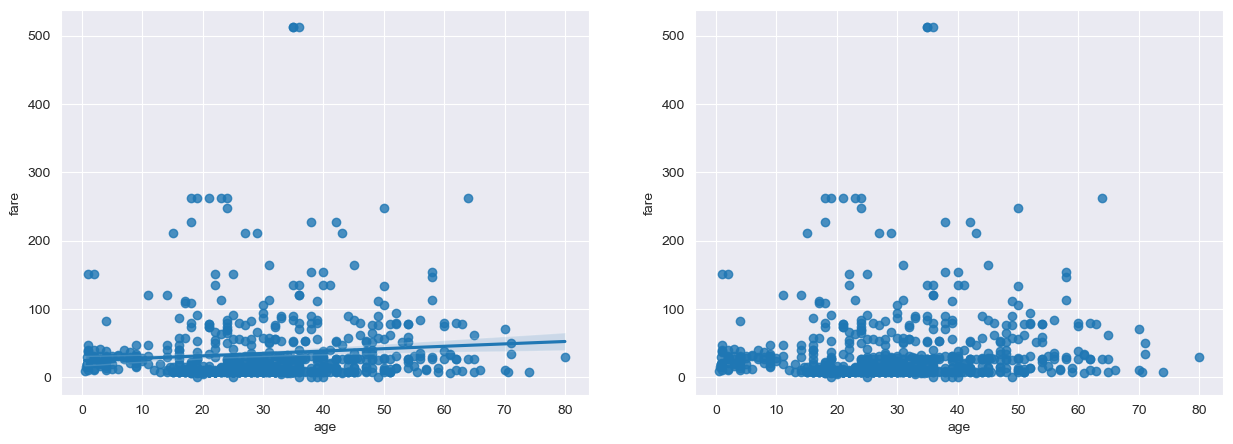

In [6]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.regplot(x='age',y='fare',data=titanic,ax=ax1,
#             회귀선(군집도가 모여있는 구간의 기울기)
            fit_reg=True)
sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)

plt.show()

In [7]:
# test set을 만드는 작업
# iloc메서드를 사용하여 열 구분
# :초기 행부터 끝 행까지
# :-1 처음 열부터 마지막 열 앞에 열까지
# -1 마지막 열
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [8]:
# 사이킷런 머신러닝 도구 : 통계분야
# train_test_split 방대한 데이터를 split(잘라서 저장) 클래스
from sklearn.model_selection import train_test_split

In [9]:
# 학습용 데이터 X값(범위)과 검증용 데이터 y값(범위)를 저장하는 변수
# 독립변수(X), 종속변수(y)
train_X,test_X, train_y,test_y = train_test_split(X,y, test_size=0.3, random_state=1)
print('train data = ',len(train_X))
print('test data = ',len(test_X))

train data =  105
test data =  45


In [10]:
# 이미지 분류 작업하는 클래스(DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

In [11]:
 # 이미지 분류 작업을 하되, 옵션값을 random_state=1로 준다.
dt_model = DecisionTreeClassifier(random_state=1)

In [12]:
# 학습용 데이터 모두 가져오기
dt_model.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

In [13]:
# 머신러닝의 뉴럴엔진을 사용하여 분류모델 작업
# 뉴럴엔진 : 사람의 뇌 신경과 비슷하게 자극을 주면, 결과물이 출력되는 함수
from sklearn.neural_network import MLPClassifier

In [14]:
# MLPClassifier 클래스를 사용하여 모델을 작성
# 히든 레이어 갯수는 2만개, 반복 500회 등등 옵션
mlp_model = MLPClassifier(hidden_layer_sizes=(100,200,50,20),
                           max_iter=500,random_state=1)

In [15]:
# 데이터를 학습(학습용 데이터 모두 가져오기)
mlp_model.fit(train_X,train_y)

MLPClassifier(hidden_layer_sizes=(100, 200, 50, 20), max_iter=500,
              random_state=1)

In [16]:
dt_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [17]:
dt_pred_y = dt_model.predict(test_X)

In [18]:
# pandas 툴로 결과물 출력
import pandas as pd
# 테이블 모형으로 결과 그래프 출력
pd.crosstab(test_y,dt_pred_y)
# y축은 예측
# X축은 사실
# ex) setosa라는 꽃으로 예측한 것이 정확하게 14개를 모두 맞췄다.

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,1,12


In [19]:
# 결과 예측능력 출력
dt_model.score(test_X,test_y)

0.9555555555555556

In [20]:
mlp_pred_y=mlp_model.predict(test_X)

In [21]:
# mlpClassifier 모델은 좀 더 정확하게 예측하는 결과 출력
# 분석 모델 알고리즘으로는 
# treeClassifier 보다 mlpClassifier가 더 좋음
pd.crosstab(test_y,mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,0,13


In [22]:
mlp_model.score(test_X, test_y)

0.9777777777777777

In [23]:
mlp_model.score(train_X, train_y)

0.9809523809523809